<a href="https://colab.research.google.com/github/YoonieJang/CS484/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
import scipy
import graphviz
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics
import sklearn.tree as tree
import statsmodels.api as stats

from google.colab import files
import io

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded = files.upload()
test_data = pd.read_csv(io.BytesIO(uploaded['WineQuality_Test.csv'])).dropna()


Saving WineQuality_Test.csv to WineQuality_Test.csv


In [ ]:
uploaded = files.upload()
train_data = pd.read_csv(io.BytesIO(uploaded['WineQuality_Train.csv'])).dropna()

Saving WineQuality_Train.csv to WineQuality_Train.csv


In [ ]:
x_test = test_data[['alcohol', 'citric_acid', 'free_sulfur_dioxide', 'residual_sugar', 'sulphates']]
y_test = test_data['quality_grp']

x_train = train_data[['alcohol', 'citric_acid', 'free_sulfur_dioxide', 'residual_sugar', 'sulphates']]
y_train = train_data['quality_grp']
nObs = train_data.shape[0]

## Q1

In [ ]:
## a)
# Suppose no limit on the maximum number of depths
accuracy = np.zeros(max_iteration)
classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=20210415 )
treeFit = classTree.fit(x_train, y_train)
treePredProb = classTree.predict_proba(x_train)
accuracy = classTree.score(x_train, y_train)
print('Misclassification rate = ', 1-accuracy)

Accuracy =  0.8158974358974359
Misclassification rate =  0.1841025641025641


In [ ]:
##b)
max_iteration = 50
w_train = np.full(nObs, 1)
accuracy = np.zeros(max_iteration)
misclassification = np.zeros(max_iteration)
ensemblePredProb = np.zeros((nObs, 2))

for iter in range(max_iteration):
    classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=20210415)
    treeFit = classTree.fit(x_train, y_train, w_train)
    treePredProb = classTree.predict_proba(x_train)
    accuracy[iter] = classTree.score(x_train, y_train, w_train)
    ensemblePredProb += accuracy[iter] * treePredProb
    misclassification[iter]=1-accuracy[iter]

    if (abs(accuracy[iter]) >= 0.9999999):
        break
    
    # Update the weights
    eventError = np.where(y_train == 1, (1 - treePredProb[:,1]), (0 - treePredProb[:,1]))
    predClass = np.where(treePredProb[:,1] >= 0.2, 1, 0)
    w_train = np.where(predClass != y_train, 2+np.abs(eventError), np.abs(eventError))

miscla_1b= DataFrame (misclassification,columns=['Misclassicification values'])
print(miscla_1b)

    Misclassicification values
0                 1.673631e-01
1                 1.537026e-01
2                 2.295574e-02
3                 2.366182e-02
4                 4.463217e-03
5                 7.267020e-03
6                 1.063419e-03
7                 6.867029e-03
8                 1.030248e-03
9                 4.114333e-04
10                6.200328e-05
11                8.556811e-04
12                1.150663e-04
13                9.365216e-05
14                8.080301e-06
15                8.040502e-07
16                1.112424e-07
17                8.747365e-08
18                0.000000e+00
19                0.000000e+00
20                0.000000e+00
21                0.000000e+00
22                0.000000e+00
23                0.000000e+00
24                0.000000e+00
25                0.000000e+00
26                0.000000e+00
27                0.000000e+00
28                0.000000e+00
29                0.000000e+00
30                0.000000e+00
31      

In [ ]:
## d) Area Under Curve metric on the Testing data using the final converged classification tree
treePredProb=treeFit.predict_proba(x_test)
AUC_1d=metrics.roc_auc_score(y_test,treePredProb[:,1])
print('AUC=',AUC_1d)

AUC= 0.31352557985145846


In [ ]:
## c)
max_iteration = 50
w_train = np.full(nObs, 1.0)
accuracy = np.zeros(max_iteration)
ensemblePredProb = np.zeros((nObs, 2))

for iter in range(max_iteration):
    classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=17, random_state=20210415)
    treeFit = classTree.fit(x_train, y_train, w_train)
    treePredProb = classTree.predict_proba(x_train)
    accuracy[iter] = classTree.score(x_train, y_train, w_train)
    ensemblePredProb += accuracy[iter] * treePredProb

    if (abs(accuracy[iter]) >= 0.9999999):
        break
    
    # Update the weights
    eventError = np.where(y_train == 1, (1 - treePredProb[:,1]), (0 - treePredProb[:,1]))
    predClass = np.where(treePredProb[:,1] >= 0.2, 1, 0)
    w_train = np.where(predClass != y_train, 2+np.abs(eventError), np.abs(eventError))
 
# Calculate the final predicted probabilities
ensemblePredProb /= np.sum(accuracy)

train_data['predCluster'] = np.where(ensemblePredProb[:,1] >= 0.5, 1, 0)
print('Accuracy = ', accuracy)
print('Misclassification rate = ', 1-accuracy)

Accuracy =  [0.98394546 0.98738399 0.99943624 1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
Misclassification rate =  [1.60545415e-02 1.26160086e-02 5.63764035e-04 0.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.000000

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


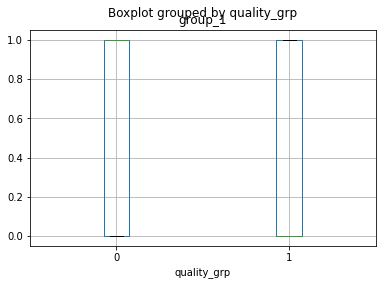

In [ ]:
## e)  grouped box-plot for the predicted probability for quality_grp = 1 on the Testing data
test_data['group_0']=treePredProb[:,0]
test_data['group_1']=treePredProb[:,1]
test_data.boxplot(column="group_1", by='quality_grp')
plt.show()

## Q2

In [ ]:
##a)Use the Forward Selection method to select input features into the model.
x_test = test_data[['alcohol', 'citric_acid', 'free_sulfur_dioxide', 'residual_sugar', 'sulphates']]
y_test = test_data['quality_grp']

x_train = train_data[['alcohol', 'citric_acid', 'free_sulfur_dioxide', 'residual_sugar', 'sulphates']]
y_train = train_data['quality_grp']

def SWEEPOperator (pDim, inputM, tol):
    # pDim: dimension of matrix inputM, integer greater than one
    # inputM: a square and symmetric matrix, numpy array
    # tol: singularity tolerance, positive real

    aliasParam = []
    nonAliasParam = []
    
    A = np.copy(inputM)
    diagA = np.diagonal(inputM)

    for k in range(pDim):
        Akk = A[k,k]
        if (Akk >= (tol * diagA[k])):
            nonAliasParam.append(k)
            ANext = A - np.outer(A[:, k], A[k, :]) / Akk
            ANext[:, k] = A[:, k] / Akk
            ANext[k, :] = ANext[:, k]
            ANext[k, k] = -1.0 / Akk
        else:
            aliasParam.append(k)
            ANext[:, k] = 0.0 * A[:, k]
            ANext[k, :] = ANext[:, k]
        A = ANext
    return (A, aliasParam, nonAliasParam)

def build_mnlogit (fullX, y):

    # Find the non-redundant columns in the design matrix fullX
    nFullParam = fullX.shape[1]
    XtX = np.transpose(fullX).dot(fullX)
    invXtX, aliasParam, nonAliasParam = SWEEPOperator(pDim = nFullParam, inputM = XtX, tol = 1e-7)

    # Build a multinomial logistic model
    X = fullX.iloc[:, list(nonAliasParam)]
    logit = stats.MNLogit(y, X)
    thisFit = logit.fit(method = 'newton', maxiter = 1000, gtol = 1e-6, full_output = True, disp = True)
    thisParameter = thisFit.params
    thisLLK = logit.loglike(thisParameter.values)

    # The number of free parameters
    nYCat = thisFit.J
    thisDF = len(nonAliasParam) * (nYCat - 1)

    # Return model statistics
    return (thisLLK, thisDF, thisParameter, thisFit)

chi_dict={}

y= train_data['quality_grp'].astype('category')
y_categories = y.cat.categories

devianceTable = pd.DataFrame()

# Step 0: Intercept only model
u = pd.DataFrame()
u = y.isnull()

designX = pd.DataFrame(u.where(u, 1)).rename(columns = {'quality_grp':"const"})
LLK0, DF0, fullParams0, thisFit = build_mnlogit (designX, y)

Optimization terminated successfully.
         Current function value: 0.495052
         Iterations 5


In [ ]:
# Step 1.1: Intercept + a
first = ['alcohol', 'citric_acid', 'free_sulfur_dioxide', 'residual_sugar', 'sulphates']
for i in range (5):
  model = first[i]
  trainData = train_data[model].dropna()
  trainData = stats.add_constant(trainData,prepend=True)
  LLK1, DF1, fullParams1, thisFit = build_mnlogit(trainData, y)
  testDev = 2.0 * (LLK1 - LLK0)
  testDF = DF1 - DF0
  testPValue = scipy.stats.chi2.sf(testDev, testDF)
  if testPValue<0.05:
    chi_dict[first[i]]=testPValue
key_min = min(chi_dict.keys(),key = (lambda k : chi_dict[k]))
print('Model 1 = Intercept +',key_min)    

Optimization terminated successfully.
         Current function value: 0.418216
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.493659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.495006
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.492289
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.494435
         Iterations 5
Model 1 = Intercept + ('alcohol', 'free_sulfur_dioxide', 'sulphates', 'citric_acid', 'residual_sugar')


In [ ]:
# Step 1.2: Intercept + 'Alcohol' +a
second = [('alcohol', 'citric_acid'),('alcohol',  'free_sulfur_dioxide'), ('alcohol', 'residual_sugar'), ('alcohol', 'sulphates')]
for i in range (4):
  model = list(second[i])
  trainData = train_data[model].dropna()
  trainData = stats.add_constant(trainData,prepend=True)
  LLK1, DF1, fullParams1, thisFit = build_mnlogit(trainData, y)
  testDev = 2.0 * (LLK1 - LLK0)
  testDF = DF1 - DF0
  testPValue = scipy.stats.chi2.sf(testDev, testDF)
  if testPValue < 0.05:
    chi_dict[second[i]]=testPValue
key_min = min(chi_dict.keys(),key = (lambda k : chi_dict[k]))
print('Model 2 = Intercept +','+'.join(''.join(i)for i in key_min))

Optimization terminated successfully.
         Current function value: 0.416593
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.415118
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.416694
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.417141
         Iterations 6
Model 2 = Intercept + alcohol+free_sulfur_dioxide+sulphates+citric_acid+residual_sugar


In [ ]:
# Step 1.3: Intercept + 'Alcohol' +'free_sulfur_dioxide' +a
third = [('alcohol','free_sulfur_dioxide', 'citric_acid'),('alcohol', 'free_sulfur_dioxide','residual_sugar'), 
          ('alcohol','free_sulfur_dioxide', 'sulphates')]
          
for i in range (3):
  model = list(third[i])
  trainData = train_data[model].dropna()
  trainData = stats.add_constant(trainData,prepend=True)
  LLK1, DF1, fullParams1, thisFit = build_mnlogit(trainData, y)
  testDev = 2.0 * (LLK1 - LLK0)
  testDF = DF1 - DF0
  testPValue = scipy.stats.chi2.sf(testDev, testDF)
  if testPValue < 0.05:
    chi_dict[third[i]]=testPValue
key_min = min(chi_dict.keys(),key = (lambda k : chi_dict[k]))
print('Model 3 = Intercept +','+'.join(''.join(i)for i in key_min))

Optimization terminated successfully.
         Current function value: 0.413735
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.414497
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.413206
         Iterations 6
Model 3 = Intercept + alcohol+free_sulfur_dioxide+sulphates+citric_acid+residual_sugar


In [ ]:
# Step 1.4: Intercept + 'Alcohol' +'free_sulfur_dioxide'+ 'sulphates'+ a
fourth = [('alcohol','free_sulfur_dioxide', 'sulphates','citric_acid'),('alcohol', 'free_sulfur_dioxide','sulphates','residual_sugar')]
          
for i in range (2):
  model = list(fourth[i])
  trainData = train_data[model].dropna()
  trainData = stats.add_constant(trainData,prepend=True)
  LLK1, DF1, fullParams1, thisFit = build_mnlogit(trainData, y)
  testDev = 2.0 * (LLK1 - LLK0)
  testDF = DF1 - DF0
  testPValue = scipy.stats.chi2.sf(testDev, testDF)
  if testPValue < 0.05:
    chi_dict[fourth[i]]=testPValue
key_min = min(chi_dict.keys(),key = (lambda k : chi_dict[k]))
print('Model 4 = Intercept +','+'.join(''.join(i)for i in key_min))

Optimization terminated successfully.
         Current function value: 0.412059
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412167
         Iterations 6
Model 2 = Intercept + alcohol+free_sulfur_dioxide+sulphates+citric_acid


In [ ]:
# Step 1.5: Intercept + 'Alcohol' +'free_sulfur_dioxide'+ 'sulphates'+ 'citric_acid'+a
fifth = [('alcohol', 'free_sulfur_dioxide','sulphates','citric_acid','residual_sugar')]
          
for i in range (1):
  model = list(fifth[i])
  trainData = train_data[model].dropna()
  trainData = stats.add_constant(trainData,prepend=True)
  LLK1, DF1, fullParams1, thisFit = build_mnlogit(trainData, y)
  testDev = 2.0 * (LLK1 - LLK0)
  testDF = DF1 - DF0
  testPValue = scipy.stats.chi2.sf(testDev, testDF)
  if testPValue < 0.05:
    chi_dict[fifth[i]]=testPValue
key_min = min(chi_dict.keys(),key = (lambda k : chi_dict[k]))
print('Model 5 = Intercept +','+'.join(''.join(i)for i in key_min))

Optimization terminated successfully.
         Current function value: 0.411221
         Iterations 7
Model 5 = Intercept + alcohol+free_sulfur_dioxide+sulphates+citric_acid+residual_sugar


In [ ]:
#b) What is the Area Under Curve metric on the Testing data?
feature2b = LogisticRegression(random_state=0).fit(x_train,y_train)
treePreProb2b = feature2b.predict_proba(x_test)
AUC_2b=metrics.roc_auc_score(y_test,treePreProb2b[:,1])
print('AUC on the testing data with input features: ',AUC_2b)

AUC on the testing data with input features:  0.7723613128085971


In [ ]:
#c) Generate 10,000 Bootstrap samples from the Training data.  
from sklearn.linear_model import LogisticRegression
import random

# Create a bootstrap sample from the population
def sample_wr (inData):
    n = len(inData)
    outData = np.empty((n,6))
    for i in range(n):
        j = int(random.random() * n)
        outData[i] = inData[j]
    return outData

def bootstrap_classTree (x_train, y_train, x_test,y_test, nB):
   x_index = x_train.index
   model = LogisticRegression(random_state=20210415)
   AUC_test = np.zeros((nB))

   # Initialize internal state of the random number generator.
   random.seed(20210415)

   for iB in range(nB):
      bootIndex = sample_wr(x_index)
      x_train_boot = x_train.loc[bootIndex[:,0]]
      y_train_boot = y_train.loc[bootIndex[:,0]]
      modelFit = model.fit(x_train_boot, y_train_boot)
      ModelProb = model.predict_proba(x_test)
      AUC_test[iB] = metrics.roc_auc_score(y_test, ModelProb[:,1])

   return AUC_test

nB = 10000
auc_roc = bootstrap_classTree(x_train, y_train, x_test, y_test, nB)

Confidence Interval : 0.7687049, 0.7738949


TypeError: ignored

In [ ]:
plt.hist(auc_roc, bins = np.arange(min(auc_roc),max(auc_roc) + 0.001,0.001), align='mid')
plt.xlabel('Area Under Curve values')
plt.show()

In [ ]:
#d)
auc2d= DataFrame (auc_roc,columns=['AUC values'])
print(auc2d)
print ('2.5th percentile : {:.7f} \n97.5th percentile :  {:.7f}'.format(np.percentile(auc_roc, (2.5)), np.percentile(auc_roc, (97.5))))


      AUC values
0       0.769351
1       0.772672
2       0.772502
3       0.773180
4       0.773467
...          ...
9995    0.772643
9996    0.772678
9997    0.770788
9998    0.773827
9999    0.773782

[10000 rows x 1 columns]
2.5th percentile : 0.7687049 
97.5th percentile :  0.7738949


In [ ]:
# d) What is the Area Under Curve metric on the Testing data using the final converged classification tree?
print ('2.5th percentile : {:.7f}\n97.5th percentile :  {:.7f}'.format(np.percentile(auc_roc, (2.5)), np.percentile(auc_roc, (97.5))))

2.5th percentile : 0.7687049
97.5th percentile :  0.7738949
